In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_sample = "utitles_cats_short.tsv"
data = "utitles_cats.tsv"
data_with_atx = "utitles_cats_atx.tsv"

# Start

In [6]:
data_sample = "utitles_cats_short.tsv"
df = pd.read_csv(data_sample, sep="\t")
df.rename(columns={'Название': "name", "Категория": "category"}, inplace=True)
df.head()

,name,category
0,"!Алмагель Нео сусп. пак. 10мл №10 (при изжоге,...",АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10
1,!Алмагель Нео сусп. пак. 10мл №10 при изжоге и...,АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10
2,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ АПЕЛЬСИН
3,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ КЛУБНИКА
4,!Ибупрофен Велфарм таб. 200мг №30 обезболивающее,ИБУПРОФЕН ТАБ 200 МГ №30


In [7]:
df.value_counts('category')

category
ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ              3229
АЛМАГЕЛЬ А СУСП ПАК 10 МЛ №10               2528
НУРОФЕН ЭКСПРЕСС ФОРТЕ КАПС 400 МГ №10      2136
НУРОФЕН ТАБ 200 МГ №10                      2071
ИБУПРОФЕН ТАБ 400 МГ №20                    1890
НУРОФЕН ЭКСПРЕСС КАПС 200 МГ №8             1860
НУРОФЕН ЭКСПРЕСС КАПС 200 МГ №16            1818
ИБУПРОФЕН ТАБ 200 МГ №50                    1783
НУРОФЕН ДЕТ СУСП 100 МЛ КЛУБНИКА            1751
АЛМАГЕЛЬ СУСП ПАК 10 МЛ №10                 1683
НУРОФЕН ЭКСПРЕСС ФОРТЕ КАПС 400 МГ №20      1652
ИБУПРОФЕН ТАБ 200 МГ №20                    1578
НУРОФЕН ТАБ 200 МГ №8                       1550
НУРОФЕН ТАБ 200 МГ №20                      1545
АЛМАГЕЛЬ А СУСП ФЛАК 170 МЛ                 1498
ИБУПРОФЕН ГЕЛЬ 5% 50 Г                      1484
НУРОФЕН ФОРТЕ ТАБ 400 МГ №12                1455
НУРОФЕН ДЕТ СУСП 150 МЛ АПЕЛЬСИН            1438
НУРОФЕН ЭКСПРЕСС КАПС 200 МГ №24            1283
ИБУПРОФЕН ТАБ 400 МГ №30                    1251
АЛМАГЕЛЬ СУ

### Приведение к общему виду


### Чистка данных

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

from tqdm.notebook import tqdm
from pymystem3 import Mystem
from gensim.corpora import Dictionary

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('russian')
alphabet = list('абвгдеёжзийклмнопрстуфхцчшщъыьэюя0123456789/')

def preproc(texts, is_list=True):
    if not is_list:
        texts = [texts]
    stemmer = Mystem()
    corpus = []
    for text in tqdm(texts):
        text = re.sub(r'[^\w\s\d№]', ' ', text)
        tokens = nltk.word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stopwords]


        tokens = [stemmer.lemmatize(word)[0] for word in tokens]

        corpus.append(' '.join(tokens))
    return corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
df_2 = df.copy(deep=True)
tqdm.pandas()
df_2.head()

,name,category
0,"!Алмагель Нео сусп. пак. 10мл №10 (при изжоге,...",АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10
1,!Алмагель Нео сусп. пак. 10мл №10 при изжоге и...,АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10
2,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ АПЕЛЬСИН
3,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ КЛУБНИКА
4,!Ибупрофен Велфарм таб. 200мг №30 обезболивающее,ИБУПРОФЕН ТАБ 200 МГ №30


In [ ]:
texts = list(df_2['name'])

print(preproc(texts[0], False))

texts = preproc(texts)

  0%|          | 0/1 [00:00<?, ?it/s]

['алмагель нео сусп пак 10мл № изжога боль желудок взд']


  0%|          | 0/56198 [00:00<?, ?it/s]

In [9]:
from sklearn.preprocessing import LabelEncoder


def prepare_dataset(df):
    texts = list(df['name'])
    tests = preroc(texts)
    df['prepared_text'] = texts
    le = LabelEncoder()
    df['category_encoded'] = le.fit_transform(df['category'])

'алмагель нео сусп пак 10мл № изжога боль желудок взд'

In [39]:
df_2['prepared_text'] = texts
df_2.head()

,name,category,prepared_text
0,"!Алмагель Нео сусп. пак. 10мл №10 (при изжоге,...",АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10,алмагель нео сусп пак 10мл 10 изжога боль желу...
1,!Алмагель Нео сусп. пак. 10мл №10 при изжоге и...,АЛМАГЕЛЬ НЕО СУСП ПАК 10 МЛ №10,алмагель нео сусп пак 10мл 10 изжога вздутие ж...
2,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ АПЕЛЬСИН,ибупрофный акос сусп д прием внутрь 100мг 5мл ...
3,!Ибупрофен АКОС сусп. д/приема внутрь 100мг/5м...,ИБУПРОФЕН СУСП 20 МГ/МЛ 100 МЛ КЛУБНИКА,ибупрофный акос сусп д прием внутрь 100мг 5мл ...
4,!Ибупрофен Велфарм таб. 200мг №30 обезболивающее,ИБУПРОФЕН ТАБ 200 МГ №30,ибупрофный велфарм таб 200мг 30 обезболивать


In [8]:
category_alphabet = set()
for i in set(df_2['category']):
   category_alphabet = category_alphabet.union(set(i))

name_alphabet = set()
for i in set(df_2['name']):
   name_alphabet = name_alphabet.union(set(i))

len(category_alphabet)



NameError: name 'df_2' is not defined

In [5]:
!pip3 install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 79.1 MB/s eta 0:00:00:00:010:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1a5a8ed3a2c15e2bbc5030fa2547a1705b7d009cef8a8c129bb7c0c81308f83b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


## Модель
### Векторизация
#### CountVectorize

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

texts = list(df_2['prepared_text'])
cv = CountVectorizer()
cv.fit(texts)
transformed_cvec = cv.transform(texts)
dense_cvec = transformed_cvec.todense()
dense_cvec.shape

(56198, 4001)

#### Doc2Vec

57


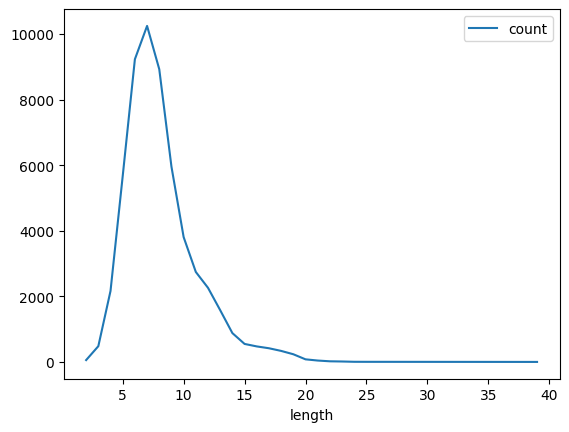

In [69]:
df_2['length'] = df_2['prepared_text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

df_2[['name', 'length']].groupby('length').count().rename(columns={'name': 'count'}).plot()


In [73]:
print(len(df_2[df_2['length'] < 3]))

57


In [44]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = []
for i, el in enumerate(texts):
    tokens = nltk.word_tokenize(el)
    tagged_data.append(TaggedDocument(words=tokens, tags=[i]))

model = Doc2Vec(tagged_data, vector_size=20, window=3, min_count=1, epochs=80)

## TF-IDF
### функция подготовки данных

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch


def TFIDF_vect_lite(text: list, category, test_size=0.3, stratify=True):
    le = LabelEncoder()
    y = le.fit_transform(category)
    
    if stratify:
        X_train, X_test, y_train, y_test,  = train_test_split(texts, y, random_state=42, test_size=test_size, stratify=y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(texts, y, random_state=42, test_size=test_size)

    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    print('done')
    return X_train, y_train, X_test, y_test, le, tfidf_vectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

def sparse_collate_fn(batch):
    data = [item[0] for item in batch]  
    target = torch.tensor([item[1] for item in batch], dtype=torch.long)
    return torch.stack(data), target


def TFIDF_vect(texts: list, category, test_size=0.3, stratify=True):
    le = LabelEncoder()
    y = le.fit_transform(category)
    
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(texts, y, random_state=42, test_size=test_size, stratify=y)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, stratify=y_train)
    else:
        X_train, X_test, y_train, y_test = train_test_split(texts, y, random_state=42, test_size=test_size)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    X_val = tfidf_vectorizer.transform(X_val)
    X_train_coo = X_train.tocoo()
    X_test_coo = X_test.tocoo()
    X_val_coo = X_val.tocoo()
    print('X_train starting...')

    X_train_tensor = torch.sparse_coo_tensor(
        torch.tensor(np.vstack((X_train_coo.row, X_train_coo.col))),
        torch.tensor(X_train_coo.data),
        X_train.shape,
        dtype=torch.float32 
        ).to('cuda' if torch.cuda.is_available() else 'cpu')

    X_test_tensor = torch.sparse_coo_tensor(
        torch.tensor(np.vstack((X_test_coo.row, X_test_coo.col))),
        torch.tensor(X_test_coo.data),
        X_test.shape,
        dtype=torch.float32
        ).to('cuda' if torch.cuda.is_available() else 'cpu')

    X_val_tensor = torch.sparse_coo_tensor(
        torch.tensor(np.vstack((X_val_coo.row, X_val_coo.col))),
        torch.tensor(X_val_coo.data),
        X_val.shape,
        dtype=torch.float32
        ).to('cuda' if torch.cuda.is_available() else 'cpu')
    
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)
    y_val = torch.tensor(y_val, dtype=torch.long)
    train_dataset = TensorDataset(X_train_tensor, y_train)
    test_dataset = TensorDataset(X_test_tensor, y_test)
    val_dataset = TensorDataset(X_val_tensor, y_val)
    input_dim = train_dataset[0][0].shape[0]
    print("input dim:", input_dim)
    
    batch_size = 1024
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=sparse_collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=sparse_collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=sparse_collate_fn)
    return train_dataloader, test_dataloader, val_dataloader, le, tfidf_vectorizer, input_dim
    

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

le = LabelEncoder()
y = le.fit_transform(df_2['category'])

X_train, X_test, y_train, y_test = train_test_split(texts, y, random_state=42, test_size=0.3, stratify=y)

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("balanced accuracy:")
print(balanced_accuracy_score(y_pred, y_test))
print("precion: ")
print(precision_score(y_pred, y_test, average='macro'))
print("recall: ")
print(recall_score(y_pred, y_test, average='macro'))
print("f1: ")
print(f1_score(y_pred, y_test, average='macro'))
print("accuracy: ")
print(accuracy_score(y_pred, y_test))

print("logic_regression:")
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("balanced accuracy:")
print(balanced_accuracy_score(y_pred, y_test))
print("precion: ")
print(precision_score(y_pred, y_test, average='macro'))
print("recall: ")
print(recall_score(y_pred, y_test, average='macro'))
print("f1: ")
print(f1_score(y_pred, y_test, average='macro'))
print("accuracy: ")
print(accuracy_score(y_pred, y_test))

balanced accuracy:
0.8817567981474956
precion: 
0.6610556322910852
recall: 
0.7780207042477902
f1: 
0.6611566490430766
accuracy: 
0.8182087781731909
logic_regression:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


balanced accuracy:
0.9444689886165158
precion: 
0.917267705331208
recall: 
0.9444689886165158
f1: 
0.9255029032894694
accuracy: 
0.9284697508896798


In [79]:
X_train

array(<39338x3578 sparse matrix of type '<class 'numpy.float64'>'
	with 259615 stored elements in Compressed Sparse Row format>,
      dtype=object)

### Разбиваем на обучающуюся и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df_2['category_encoded'] = le.fit_transform(df_2['category'])

X_train, X_test, y_train, y_test = train_test_split(np.array(dense_cvec), list(df_2['category_encoded']), random_state=42, test_size=0.3, stratify=df_2['category_encoded'])


### LogicRegression + CountVecttorize

In [17]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("balanced accuracy:")
print(balanced_accuracy_score(model.predict(X_train), y_train))
print(balanced_accuracy_score(model.predict(X_test), y_test))
print("precion: ")
print(precision_score(model.predict(X_train), y_train, average='macro'))
print(precision_score(model.predict(X_test), y_test, average='macro'))
print("recall: ")
print(recall_score(model.predict(X_train), y_train, average='macro'))
print(recall_score(model.predict(X_test), y_test, average='macro'))
print("f1: ")
print(f1_score(model.predict(X_train), y_train, average='macro'))
print(f1_score(model.predict(X_test), y_test, average='macro'))
print("accuracy: ")
print(accuracy_score(model.predict(X_train), y_train))
print(accuracy_score(model.predict(X_test), y_test))


balanced accuracy:
0.8890430150704535
0.845115106018204
precion: 
0.8260198794712476
0.784164898589826
recall: 
0.8890430150704535
0.845115106018204
f1: 
0.8425577827703142
0.7965527505789589
accuracy: 
0.8634145101428644
0.8298932384341637


In [18]:
import pickle

with open('models/logic_regression_2.pkl', 'wb') as file:
    pickle.dump(model, file)

pytourch

In [76]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

# Функции обучения модели

In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
import torch.optim as optim
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

class MyNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 8192)
        self.fc2 = nn.Linear(8192, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, 512)
        self.fc6 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

In [3]:
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def train_single_epoch(model, train_dataloader, val_dataloader, criterion, optimizer, device):
    model.train()
    train_loss = [0]
    val_loss = [0]
    val_acc = []
    val_recall = []
    val_precision = []
    val_f1 = []
    
    avg_loss = 0.0
    for ind, (X_batch, y_batch) in enumerate(tqdm(train_dataloader)):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        avg_loss += loss.item()
        train_loss[ind // 501] += loss.item()
        if ind % 500 == 0 and ind != 0:
            model.eval()
            val_temp_loss, val_temp_acc, val_temp_recall, val_temp_precision, val_temp_f1 = val_single_epoch(model, val_dataloader, criterion, device)
            print("VALIDATION - batch:", ind, "loss:", val_temp_loss, "accuracy:", val_temp_acc, "recall:", val_temp_recall, "precision:", val_temp_precision, "f1:", val_temp_f1)
            train_loss.append(0)
            val_loss.append(val_temp_loss)
            val_acc.append(val_temp_acc)
            val_recall.append(val_temp_recall)
            val_precision.append(val_temp_precision)
            val_f1.append(val_temp_f1)
            train_loss[ind // 501] /= (ind - (ind // 501) * 500 + 1)
            print("ind // 501:", ind // 501, "del:", ind - (ind // 501) * 500 + 1)
            print("train Loss:", train_loss[ind // 501])

            model.train()


    avg_loss = avg_loss/len(train_dataloader)
    return model, avg_loss

def test_single_epoch(model, test_dataloader, criterion, device):
    model.eval()

    avg_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in tqdm(test_dataloader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            avg_loss += loss.item()

    avg_loss = avg_loss/len(test_dataloader)
    return avg_loss

def val_single_epoch(model, val_dataloader, criterion, device):
    # model.eval()
    avg_loss = 0.0
    acc = 0.0
    f1 = 0.0
    recall = 0.0
    precision = 0.0
    with torch.no_grad():
        for X_batch, y_batch in tqdm(val_dataloader):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            avg_loss += loss.item()
            y_pred = y_pred.argmax(dim=1).cpu().numpy()
            y_true = y_batch.cpu().numpy()
            acc += accuracy_score(y_true, y_pred)
            precision += precision_score(y_true, y_pred, average='weighted', zero_division=0)
            recall += recall_score(y_true, y_pred, average='weighted',  zero_division=0)
            f1 += f1_score(y_true, y_pred, average="weighted",  zero_division=0)
            
    avg_loss = avg_loss/len(val_dataloader)
    acc /= len(val_dataloader)
    precision /= len(val_dataloader)
    recall /= len(val_dataloader)
    f1 /= len(val_dataloader)
    return avg_loss, acc, recall, precision, f1
    
def train_test_model(model, train_dataloader, test_dataloader, val_dataloader, criterion,
                     optimizer, device="cuda", log_freq = 20, num_epochs=100, scheduler=None):
    
    for epoch in range(num_epochs):
        model, train_loss = train_single_epoch(model, train_dataloader, val_dataloader, criterion, optimizer, device)
        test_loss = test_single_epoch(model, test_dataloader, criterion, device)
        if epoch % log_freq == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
        if scheduler != None:
            scheduler.step()


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = X_train.shape[1]
num_classes = len(torch.unique(y_train))
model = LogisticRegression(input_dim, num_classes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100



for epoch in range(num_epochs):
    model, train_loss = train_single_epoch(model, train_dataloader, criterion, optimizer, device)
    test_loss = test_single_epoch(model, test_dataloader, criterion, device)
    if epoch % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


NameError: name 'X_train' is not defined

In [49]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer

model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device))

y_pred = y_pred.argmax(dim=1).cpu().numpy()
y_true = y_test.cpu().numpy()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') 
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.3586
Precision: 0.3382
Recall: 0.3586
F1-score: 0.2853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### randomforestclassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

halving_search = HalvingRandomSearchCV(model, param_grid, cv=5, verbose=1, random_state=42)
halving_search.fit(X_train, y_train)

print("Наилучшие параметры:", halving_search.best_params_)
print("Наилучшая оценка:", halving_search.best_score_)
best_model = halving_search.best_estimator_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 510
max_resources_: 39338
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 77
n_resources: 510
Fitting 5 folds for each of 77 candidates, totalling 385 fits
----------
iter: 1
n_candidates: 26
n_resources: 1530
Fitting 5 folds for each of 26 candidates, totalling 130 fits
----------
iter: 2
n_candidates: 9
n_resources: 4590
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 13770
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Наилучшие параметры: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'class_weight': None}
Наилучшая оценка: 0.8005524573311587


In [21]:
import pickle

with open('models/random_forest_3.pkl', 'wb') as file:
    pickle.dump(best_model, file)

## Catboost

In [8]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

X_train, X_test, y_train, y_test, le, tf_idf = TFIDF_vect(texts, df_2['category'], test_size=0.3, stratify=True)


params = {
    'depth': [4, 5, 7, 8, 10],
    'learning_rate': [0.1, 0.2, 0.3],
    'iterations': [ 200, 300, 500],
    'l2_leaf_reg': [0.5, 1, 2, 2.5, 3]
    
}

model = CatBoostClassifier(
    loss_function='MultiClass',
    custom_metric="F1",
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,
    task_type="GPU",
    devices='0-1'
)

random_search = RandomizedSearchCV(model, params, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(random_search.best_params_)

0:	learn: 0.4378138	total: 669ms	remaining: 5m 33s
100:	learn: 0.8202415	total: 48.8s	remaining: 3m 12s
200:	learn: 0.8355577	total: 1m 34s	remaining: 2m 20s
300:	learn: 0.8453765	total: 2m 19s	remaining: 1m 32s
400:	learn: 0.8519225	total: 3m 5s	remaining: 45.7s
499:	learn: 0.8582777	total: 3m 50s	remaining: 0us
0:	learn: 0.4436289	total: 548ms	remaining: 4m 33s
100:	learn: 0.8227836	total: 48.3s	remaining: 3m 10s
200:	learn: 0.8374325	total: 1m 34s	remaining: 2m 19s
300:	learn: 0.8493168	total: 2m 20s	remaining: 1m 32s
400:	learn: 0.8549094	total: 3m 5s	remaining: 45.8s
499:	learn: 0.8612647	total: 3m 50s	remaining: 0us
0:	learn: 0.4427073	total: 549ms	remaining: 4m 33s
100:	learn: 0.8237369	total: 48.3s	remaining: 3m 10s
200:	learn: 0.8375596	total: 1m 33s	remaining: 2m 19s
300:	learn: 0.8476644	total: 2m 19s	remaining: 1m 32s
400:	learn: 0.8536384	total: 3m 4s	remaining: 45.5s
499:	learn: 0.8598983	total: 3m 49s	remaining: 0us
0:	learn: 0.4376092	total: 554ms	remaining: 4m 36s
300:

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

# Большой датасет
Обработка

In [6]:
import pandas as pd


bdf = pd.read_csv(data_sample, sep="\t", usecols=[0, 3, 5])

bdf.head()

,title,title_cat,is_drug
0,NaN,NaN,False
1,"б/л чай ""мелисса,чабрец,фенхель""успокаив",NaN,False
2,! Accu-chek перформа глюкометр комплект N 1,NaN,False
3,! Blend-a-med про эксперт паста зубная отбелив...,БЛЕНД-А-МЕД ЗУБНАЯ ПАСТА ПРО ЭКСПЕРТ КРЕПКИЕ З...,False
4,! Hartmann cosmos hyd act платырь от ожогов N 3,NaN,False


In [7]:
bdf_2 = bdf[bdf['is_drug'] == True].copy(deep=True)
bdf_2.drop('is_drug', inplace=True, axis=1)
bdf_2.head(5)

,title,title_cat
6,! Велвумен капс д/женщин N30,"ВЕЛВУМЕН КАПС 1,262 Г №30"
7,! Велвумен капс д/женщин N30,"ВЕЛВУМЕН КАПС 1,262 Г №30"
8,! Вечернее дрраже валериана + пустырник n120,ВЕЧЕРНЕЕ ПЛЮС ДРАЖЕ №120 ВАЛЕРИАНА ПУСТЫРНИК
9,! Вечернее дрраже валериана + пустырник n120,ВЕЧЕРНЕЕ ПЛЮС ДРАЖЕ №120 ВАЛЕРИАНА ПУСТЫРНИК
14,! Перфектил платинум тб N 60,ПЕРФЕКТИЛ ПЛАТИНУМ ТАБ №60


mean: 38.88533872112567 std: 15.486427783524716 lower bound: 7.912483154076238 upper_bound: 69.8581942881751


<Axes: >

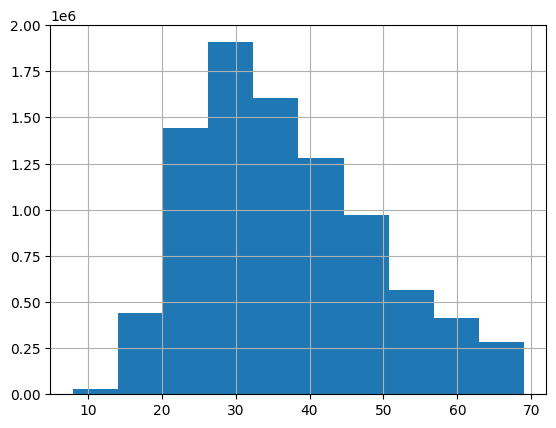

In [8]:
bdf_2['title_length'] = bdf_2['title'].str.len()
std = bdf_2['title_length'].std()
mean = bdf_2['title_length'].mean()
lower_bound, upper_bound = mean - 2 * std, mean + 2 * std

print("mean:", mean, "std:", std, "lower bound:", lower_bound, "upper_bound:", upper_bound)

bdf_2 = bdf_2[(bdf_2['title_length'] >= lower_bound) & (bdf_2['title_length'] <= upper_bound)]

bdf_2['title_length'].hist()

In [5]:
len(bdf_2)

8935447

In [9]:
cat_count = bdf_2['title_cat'].value_counts().reset_index()
print(len(cat_count))
cat_count.head(5)

17266


,title_cat,count
0,НИМЕСИЛ ГРАН 100 МГ (2 Г) №30,13082
1,АТОРВАСТАТИН ТАБ 20 МГ №30,12162
2,АМЛОДИПИН ТАБ 5 МГ №30,11421
3,АМЛОДИПИН ТАБ 10 МГ №30,11063
4,ЦЕФТРИАКСОН ПОР 1 Г №1,10817


In [7]:
cat_count.tail(5)

,title_cat,count
17261,МААЛОКС ЖЕВ ТАБ 400 МГ №40 БЕЗ САХАРА ЛИМОН,1
17262,АТЕРОКЛЕФИТ ЧАЙ 2 Г №20,1
17263,ЛЮТЕИН ФОРТЕ ТАБ №100 ЧЕРНИКА,1
17264,"АСКОРБИНОВАЯ ТАБ 25 МГ 2,9 Г №10 ЧЕРНИКА",1
17265,ЭМОЦИВИТ КАПС 440 МГ №30,1


In [19]:
print("len:", len(cat_count[cat_count['count'] < 150]), 'mean:', cat_count['count'].mean())


len: 7873 mean: 517.5169118498784


<Axes: >

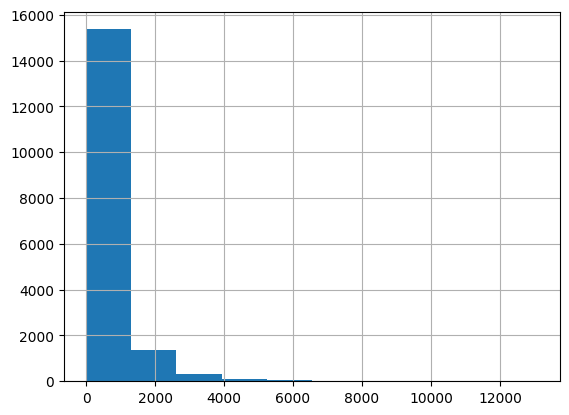

In [15]:
cat_count[cat_count['count'] < float('inf')]['count'].hist()

In [59]:
len(cat_count[cat_count['count'] < 1000])

14595

In [58]:
print("categories: ",len(set(bdf_2['title_cat'])))

categories:  17266


Попробую отрезать классы с очень малым числом примеров, сделаем порог в 1000

In [12]:
bdf_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9361905 entries, 6 to 21376725
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   title      object
 1   title_cat  object
 2   is_drug    bool  
dtypes: bool(1), object(2)
memory usage: 223.2+ MB


In [10]:
cat_count_2 = cat_count[cat_count['count'] > 1000].copy(deep=True)
bdf_3 = pd.merge(cat_count_2, bdf_2, how='inner', on='title_cat')
bdf_3.head()
print("categories: ",len(set(bdf_3['title_cat'])))

categories:  2670


In [83]:
len(bdf_3)

5515630

Обработка текстов

In [14]:
texts = preproc(list(bdf_3['title']))

  0%|          | 0/5515630 [00:00<?, ?it/s]

### сохраним промежуточный этап

In [15]:
import csv
with open("out_text.tsv", 'w', encoding='utf-8') as f:
    for text in texts:
        f.write(f"{text}\n")

In [54]:
title_len_cnt = bdf_2['title_length'].value_counts().reset_index()
title_len_cnt.head() 

,title_length,count
0,32.0,441422
1,36.0,345943
2,30.0,317484
3,31.0,309243
4,29.0,283296


<Axes: xlabel='title_length'>

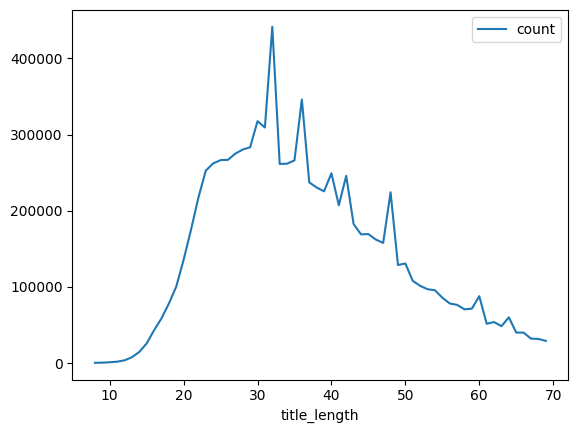

In [55]:
import matplotlib.pyplot as plt

title_len_cnt.sort_values(by='title_length').plot(x='title_length', y='count')


mean: 111.29223744292237 std: 65.53860466117804 lower bound: -19.784971879433712 upper_bound: 176.8308421041004


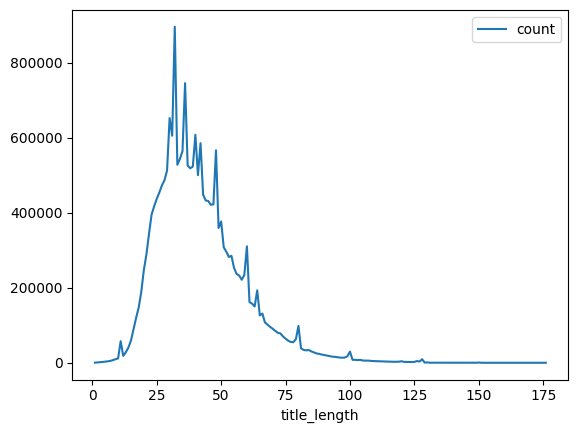

<Figure size 2400x3200 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

mean = title_len_cnt['title_length'].mean()
std = title_len_cnt['title_length'].std()
lower_bound, upper_bound = mean - 2 * std, mean + 1 * std
print("mean:", mean, "std:", std, "lower bound:", lower_bound, "upper_bound:", upper_bound)

plt.figure(figsize=(24, 32))
plt.show()

In [27]:
bdf.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,title,title_cat,is_drug,title_length
0,NaN,NaN,False,NaN
1,"б/л чай ""мелисса,чабрец,фенхель""успокаив",NaN,False,41.0
2,! Accu-chek перформа глюкометр комплект N 1,NaN,False,43.0
3,! Blend-a-med про эксперт паста зубная отбелив...,БЛЕНД-А-МЕД ЗУБНАЯ ПАСТА ПРО ЭКСПЕРТ КРЕПКИЕ З...,False,72.0
4,! Hartmann cosmos hyd act платырь от ожогов N 3,NaN,False,47.0


### read tsv
чтение заранее обработанных текстов

In [11]:
import csv

with open('out_text.tsv', 'r', encoding='utf-8') as file:
    content = file.read()
    print(content)
print(len(texts), len(bdf_3['title_cat']))

5515630

векторизация текстов и создаение dataloaders

In [12]:
from datetime import datetime

start = datetime.now()
print("start:", start.strftime("%H:%M:%S"))
train_dataloader, test_dataloader, val_dataloader, le, tf_idf_vect, input_dim = TFIDF_vect(texts, bdf_3['title_cat'])
end = datetime.now()
print("end:", end.strftime("%H:%M:%S"))
print("delta:", end - start)

start: 15:15:20
X_train starting...
input dim: 5000
end: 15:16:07
delta: 0:00:47.112268


## PCA

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, y_train, X_test, y_test, le, tfifd = TFIDF_vect_lite(texts, bdf_3['title_cat'])

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("balanced accuracy:")
print(balanced_accuracy_score(y_pred, y_test))
print("precion: ")
print(precision_score(y_pred, y_test, average='macro'))
print("recall: ")
print(recall_score(y_pred, y_test, average='macro'))
print("f1: ")
print(f1_score(y_pred, y_test, average='macro'))
print("accuracy: ")
print(accuracy_score(y_pred, y_test))

print("logic_regression:")
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("balanced accuracy:")
print(balanced_accuracy_score(y_pred, y_test))
print("precion: ")
print(precision_score(y_pred, y_test, average='macro'))
print("recall: ")
print(recall_score(y_pred, y_test, average='macro'))
print("f1: ")
print(f1_score(y_pred, y_test, average='macro'))
print("accuracy: ")
print(accuracy_score(y_pred, y_test))

NameError: name 'TFIDF_vect_lite' is not defined

## Линейная модель

In [41]:
len(cat_count_2)

2670

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = input_dim
num_classes = len(cat_count_2)
print("input_dim:", input_dim, "num_classes:", num_classes)
model = LogisticRegression(input_dim, num_classes)
model.to(device)
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

num_epochs = 2


train_test_model(model, train_dataloader, test_dataloader, val_dataloader, log_freq=1, optimizer=optimizer, criterion=criterion, scheduler=scheduler, num_epochs=2)

input_dim: 5000 num_classes: 2670


  0%|          | 0/3394 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 500 loss: 1.077146140671281 accuracy: 0.8652935755973489 recall: 0.8652935755973489 precision: 0.8613433651119201 f1: 0.8555967096604298
ind // 501: 0 del: 501
train Loss: 1785.190338730812


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 1000 loss: 0.43880008105878476 accuracy: 0.8855393553698074 recall: 0.8855393553698074 precision: 0.8873674677393693 f1: 0.8796695056158437
ind // 501: 1 del: 501
train Loss: 324.1034071147442


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 1500 loss: 0.32633442569662025 accuracy: 0.8902867265774513 recall: 0.8902867265774513 precision: 0.8929626811338829 f1: 0.8850931489466679
ind // 501: 2 del: 501
train Loss: 185.71134200692177


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 2000 loss: 0.282235170207011 accuracy: 0.8921230444564054 recall: 0.8921230444564054 precision: 0.8955059442622575 f1: 0.8873761015183728
ind // 501: 3 del: 501
train Loss: 149.91514618694782


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 2500 loss: 0.2588141942544589 accuracy: 0.8929932987342396 recall: 0.8929932987342396 precision: 0.8965809337211299 f1: 0.8883931922343653
ind // 501: 4 del: 501
train Loss: 133.86697636544704


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 3000 loss: 0.24424259597189213 accuracy: 0.8943490858592255 recall: 0.8943490858592255 precision: 0.8982734577151575 f1: 0.8900097101474593
ind // 501: 5 del: 501
train Loss: 123.54864045977592


  0%|          | 0/1616 [00:00<?, ?it/s]

Epoch 1/100, Train Loss: 0.8249, Test Loss: 0.2363


  0%|          | 0/3394 [00:00<?, ?it/s]

  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 500 loss: 0.23438885106296137 accuracy: 0.8951189684650456 recall: 0.8951189684650456 precision: 0.8992727873517825 f1: 0.8909117824504657
ind // 501: 0 del: 501
train Loss: 108.95844201743603


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 1000 loss: 0.2331111424026035 accuracy: 0.8954625737891196 recall: 0.8954625737891196 precision: 0.8995324966319059 f1: 0.8912415177934541
ind // 501: 1 del: 501
train Loss: 108.48041918873787


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 1500 loss: 0.23198214634543374 accuracy: 0.8957048729842113 recall: 0.8957048729842113 precision: 0.8998505261697719 f1: 0.8915399508887708
ind // 501: 2 del: 501
train Loss: 107.99519230425358


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 2000 loss: 0.23092697410987167 accuracy: 0.8957069068023191 recall: 0.8957069068023191 precision: 0.9000768568825632 f1: 0.8916683212047437
ind // 501: 3 del: 501
train Loss: 107.25242879986763


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 2500 loss: 0.22984274315140235 accuracy: 0.8959368381845942 recall: 0.8959368381845942 precision: 0.900034472126288 f1: 0.8917887423824871
ind // 501: 4 del: 501
train Loss: 106.50607126951218


  0%|          | 0/378 [00:00<?, ?it/s]

VALIDATION - batch: 3000 loss: 0.22875783679188874 accuracy: 0.8960536453056399 recall: 0.8960536453056399 precision: 0.900049397131641 f1: 0.8918683102154568
ind // 501: 5 del: 501
train Loss: 106.27735549211502


  0%|          | 0/1616 [00:00<?, ?it/s]

Epoch 2/100, Train Loss: 0.2153, Test Loss: 0.2276


  0%|          | 0/3394 [00:00<?, ?it/s]

KeyboardInterrupt: 

### Save models

In [14]:
import pickle
import os

os.mkdir(r'C:\Users\User\models')
os.mkdir(r'C:\Users\User\models\1')
with open(r'C:\Users\User\models\1\le.pkl', 'wb') as file:
    pickle.dump(le, file)
file.close()
with open(r'C:\Users\User\models\1\tf-idf.pkl', 'wb') as file:
    pickle.dump(tf_idf_vect, file)
file.close()

torch.save(model.state_dict(), r'C:\Users\User\models\1\logic_reg.model')
torch.save(optimizer.state_dict(), r'C:\Users\User\models\1\optimizer.model')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [55]:
torch.cuda.empty_cache()

In [ ]:
os.chdir(r'C:\Users\User\models')
os.system('zip -r models_2.zip 1')

# Предсказания модели
### load models

In [63]:
import torch
import pickle

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 5000
output_dim = 2670
device = "cuda" if torch.cuda.is_available() else "cpu"

model_path = r'C:\Users\User\models\1\logic_reg.model'
tfidf_path = r'C:\Users\User\models\1\tf-idf.pkl'
le_path = r'C:\Users\User\models\1\le.pkl'

model = LogisticRegression(input_dim, output_dim)
model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
model.to(device)
model.eval()


with open(tfidf_path, 'rb') as f:
    tf_idf_vect = pickle.load(f)

with open(le_path, 'rb') as f:
    le = pickle.load(f)


In [ ]:
    X_val = tfidf_vectorizer.transform(X_val)

    X_train_coo = X_train.tocoo()
    X_test_coo = X_test.tocoo()
    X_val_coo = X_val.tocoo()
    print('X_train starting...')

    X_train_tensor = torch.sparse_coo_tensor(
        torch.tensor(np.vstack((X_train_coo.row, X_train_coo.col))),
        torch.tensor(X_train_coo.data),
        X_train.shape,
        dtype=torch.float32
        ).to('cuda' if torch.cuda.is_available() else 'cpu'

In [64]:
import torch
import torch.nn.functional as F


def classify_data(model, tf_idf_vect, le, input_data, device, threshould=0.1):
    model.eval()
    
    X = tf_idf_vect.transform([input_data])
    X = X.tocoo()
    X_tensor = torch.sparse_coo_tensor(
        torch.tensor(np.vstack((X.row, X.col))),
        torch.tensor(X.data),
        X.shape,
        dtype=torch.float32
    ).to(device)
    
    with torch.no_grad():
        output = model(X_tensor)
        probabilities = F.softmax(output, dim=1)
        max_prob, predicted_class = torch.max(probabilities, dim=1)
        print(max_prob)
        if max_prob.item() >= threshould:
            return le.inverse_transform([predicted_class.item()])[0], max_prob.item()
        else:
            return "unknown", 0

def classify_texts(model, tf_idf_vect, le, texts, device, threshould=0.1):
    for input_data in preproc(texts):
        print(f'input data: {input_data}')
        classification, prob = classify_data(model, tf_idf_vect, le, input_data, device, threshould = threshould)
        print(f'class: {classification}, prob: {prob}')

input_data = ['Аврелий пошел на кухню', 'пошел в магаизн за огурцами, а купил капусту']
input_data.extend(texts[:4])
classify_texts(model, tf_idf_vect, le, input_data, device)

  0%|          | 0/6 [00:00<?, ?it/s]

input data: аврелий пойти кухня
tensor([0.0070], device='cuda:0')
class: unknown, prob: 0
input data: пойти магаизна огурец купить капуста
tensor([0.0070], device='cuda:0')
class: unknown, prob: 0
input data: нимешивать гранула 100мг 2г пакет № нимесулид обезболивать
tensor([0.5576], device='cuda:0')
class: НИМЕСУЛИД ГРАН 100 МГ (2 Г) №10, prob: 0.5575815439224243
input data: 1 0 нимешивать гран д сусп д прием внутрь 100 мг пак 2 г №
tensor([0.3681], device='cuda:0')
class: НАЙЗ ГРАН 50 МГ/Г 100 МГ 2 Г №9, prob: 0.3680552542209625
input data: 1 30 нимешивать 0 12 0 n30 пак гра
tensor([0.2403], device='cuda:0')
class: БИФИДУМБАКТЕРИН ПОР 850 МГ 500000000 КОЕ №30, prob: 0.24029411375522614
input data: 1 30 нимешивать пак 100 мг №
tensor([0.3759], device='cuda:0')
class: НИМЕСУЛИД ГРАН 100 МГ (2 Г) №30, prob: 0.3759028911590576
